In [308]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [309]:
df = pd.read_csv('https://raw.githubusercontent.com/egorbos-geekbrains/knowing-python/main/Lesson%2010/dataset.csv', sep=';')

In [310]:
df.head()

,Субъект РФ,"Численность студентов, всего человек, 2015","Численность студентов, очная форма, человек, 2015","Численность студентов очно-заочная (вечерняя) форма, человек, 2015","Численность студентов заочная форма, человек, 2015","Численность студентов, всего человек, 2017","Численность студентов, очная форма, человек, 2017","Численность студентов очно-заочная (вечерняя) форма, человек, 2017","Численность студентов заочная форма, человек, 2017","Численность студентов, всего человек, 2018","Численность студентов, очная форма, человек, 2018","Численность студентов очно-заочная (вечерняя) форма, человек, 2018","Численность студентов заочная форма, человек, 2018","Численность студентов, всего человек, 2019","Численность студентов, очная форма, человек, 2019","Численность студентов очно-заочная (вечерняя) форма, человек, 2019","Численность студентов заочная форма, человек, 2019",Unnamed: 17,Unnamed: 18
0,Российская Федерация,4766479,2379588,149102,2237789,4245885,2380454,135014,1730417,4161672,2369787,155588,1636297,4068327,2386578,181477,1500272,NaN,NaN
1,Центральный федеральный округ,1455273,730933,72132,652208,1303941,744398,62833,496710,1286588,747407,69939,469242,1268510,766368,79526,422616,NaN,NaN
2,Белгородская область,53050,24803,290,27957,49007,23192,387,25428,47734,22192,576,24966,46787,23530,687,22570,NaN,NaN
3,Брянская область,34540,12894,624,21022,27046,11910,970,14166,25340,11180,1152,13008,23737,10903,1193,11641,NaN,NaN
4,Владимирская область,33461,13365,217,19879,27215,12358,292,14565,27577,11762,1395,14420,26397,11272,1901,13224,NaN,NaN


In [311]:
# Убираем столбцы с отсутствующими значениями
df = df.dropna(axis=1)

**Задача 1:** Найдите, какая область центрального федерального округа имела наибольшую численность студентов вечерней формы обучения в 2015 году.

In [312]:
center = df[2:20]
center_evening_max = center['Численность студентов очно-заочная (вечерняя) форма, человек, 2015'].max()

center[center['Численность студентов очно-заочная (вечерняя) форма, человек, 2015'] == center_evening_max]

,Субъект РФ,"Численность студентов, всего человек, 2015","Численность студентов, очная форма, человек, 2015","Численность студентов очно-заочная (вечерняя) форма, человек, 2015","Численность студентов заочная форма, человек, 2015","Численность студентов, всего человек, 2017","Численность студентов, очная форма, человек, 2017","Численность студентов очно-заочная (вечерняя) форма, человек, 2017","Численность студентов заочная форма, человек, 2017","Численность студентов, всего человек, 2018","Численность студентов, очная форма, человек, 2018","Численность студентов очно-заочная (вечерняя) форма, человек, 2018","Численность студентов заочная форма, человек, 2018","Численность студентов, всего человек, 2019","Численность студентов, очная форма, человек, 2019","Численность студентов очно-заочная (вечерняя) форма, человек, 2019","Численность студентов заочная форма, человек, 2019"
19,г.Москва,759711,421320,57709,280682,715153,444315,48828,222010,706081,450473,51825,203783,699843,466792,57486,175565


**Задача 2:** Постройте диаграмму с данными о численности студентов дневной формы обучения южного федерального округа за 2017 год.

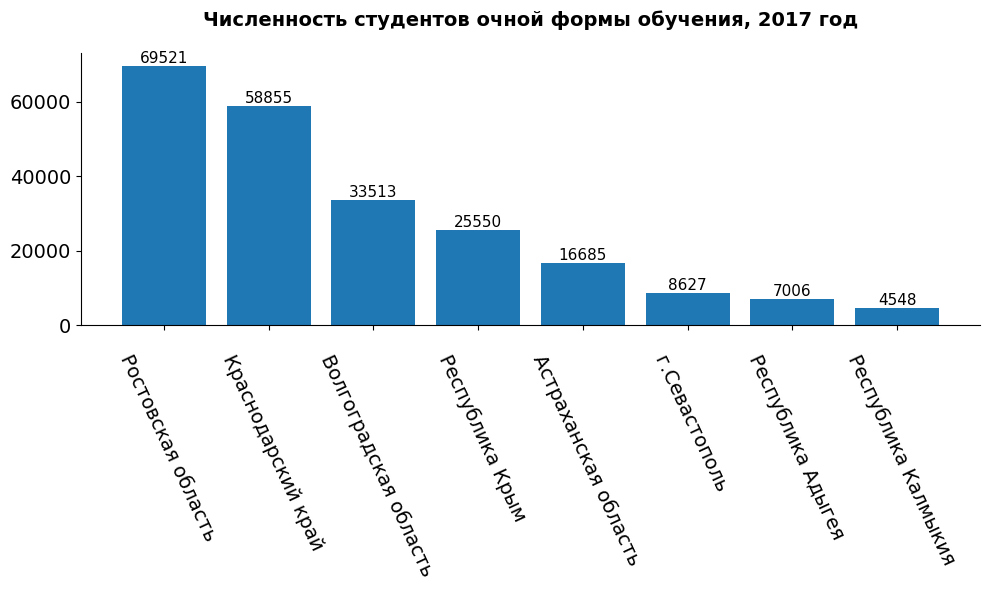

In [313]:
south = df[33: 41][['Субъект РФ', 'Численность студентов, очная форма, человек, 2017']]
south = south.sort_values(by=['Численность студентов, очная форма, человек, 2017'], ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
bars = plt.bar(south['Субъект РФ'], south['Численность студентов, очная форма, человек, 2017'])

ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.spines[['right', 'top']].set_visible(False)
ax.bar_label(bars, fontsize=11, label_type='edge')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=-65)
ax.set_title('Численность студентов очной формы обучения, 2017 год', fontsize=14, fontweight='bold', pad=20)

fig.tight_layout()
plt.show()

**Задача 3:** Постройте диаграмму количества студентов заочной формы обучения за 2019 год по всем регионам, в которых общее количество студентов не превышает 10000 за данный год.

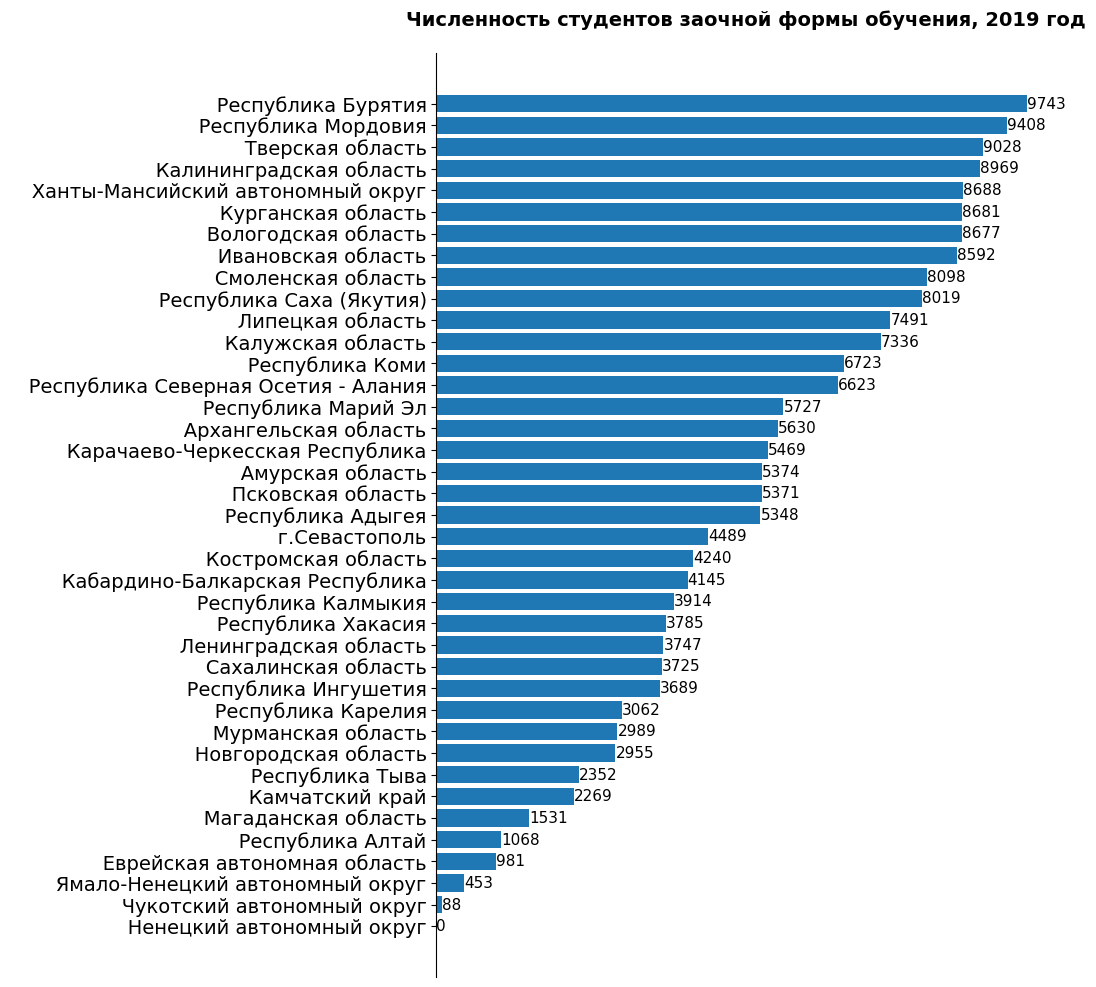

In [314]:
without_districts_mask = df[2:]['Субъект РФ'].str.contains('федеральный округ')
without_districts = df[2:].drop(df[2:][without_districts_mask].index)
without_districts = without_districts[without_districts['Численность студентов заочная форма, человек, 2019'] < 10000]
without_districts = without_districts.sort_values(by=['Численность студентов заочная форма, человек, 2019'], ascending=True)

_, ax = plt.subplots(figsize=(8, 12))
bars = plt.barh(without_districts['Субъект РФ'], without_districts['Численность студентов заочная форма, человек, 2019'], height=0.8)

ax.xaxis.set_visible(False)
ax.yaxis.set_tick_params(labelsize=14)
ax.bar_label(bars, fontsize=11, label_type='edge')
ax.spines[['right', 'top', 'bottom']].set_visible(False) 
ax.set_title('Численность студентов заочной формы обучения, 2019 год', fontsize=14, fontweight='bold', pad=20)

plt.show()